In [116]:
%matplotlib inline
# Permite cargar el modelo logistica de regresión
from sklearn.linear_model import LogisticRegression 
#Permite mostrar visualizar gráficas
import matplotlib.pyplot as myplot
#Permite cargar datos desde klearn desde los dataset ya establecidos
from sklearn.datasets import load_digits
#Carga los datos
digitos= load_digits()
#Visualiza las carateristicas del dataset
dir(digitos)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [117]:
#contiene las características, es decir, imágenes de imágenes manuscritas de dígitos, que se pueden utilizar para la clasificación.
digitos.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

<Figure size 432x288 with 0 Axes>

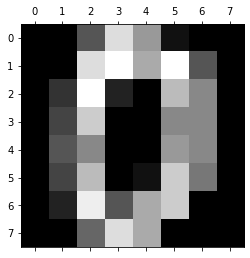

In [118]:
#esta biblioteca se utiliza para establecer el mapa de colores en "gris"
myplot.gray()
#Muestre los datos de una matriz como una nueva ventana de figura.
myplot.matshow(digitos.images[0])

<Figure size 432x288 with 0 Axes>

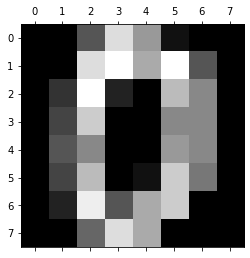

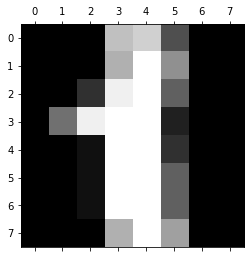

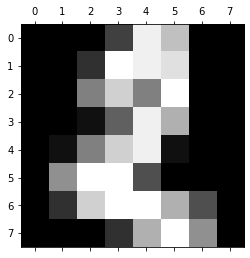

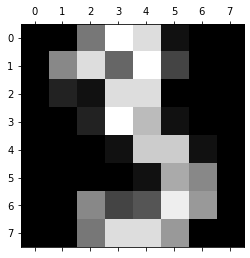

In [119]:
#Ahora mostraremos las primeras 4 imágenes
myplot.gray()
for i in range(4):
    myplot.matshow(digitos.images[i])  
    

In [120]:
#Parámetros para entrenar el modelo
digitos.target[0:5]

array([0, 1, 2, 3, 4])

In [121]:
#train_test_split permite la separación de datos de entrenamiento y pruebas
from sklearn.model_selection import train_test_split
#Se dividen los datos en en entrenamiento y pruebas, además se define mediante test_size=0.2 el porcentaje para pruebas
#También se puede definir de forma aleatoria que datos se utilizarán para el entrenamiento mediante random_state=10
X_train, X_test, y_train, y_test= train_test_split(digitos.data,digitos.target,test_size=0.2, random_state=10)

In [122]:
print('Número de muestras para el entrenamiento: ',len(X_train))

Número de muestras para el entrenamiento:  1437


In [123]:
print('Número de muestras para las pruebas: ',len(y_test))

Número de muestras para las pruebas:  360


In [124]:
#Se define el modelo de logística de regresión 
modelreg=LogisticRegression()
modelreg.fit(X_train,y_train)

c:\users\jegjo\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [137]:
print('Puntaje:', modelreg.score(X_test,y_test))

Puntaje: 0.95


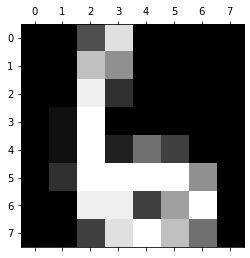

In [136]:
#Se muestra el número contenido en la imagen 
myplot.matshow(digitos.images[67])

In [139]:
#Se muestra el número objetivo
digitos.target[67]

6

In [128]:
#Se envia el valor para validar el modelo
modelreg.predict([digitos.data[67]])

array([6])

In [140]:
#Ahora se mostrará la predicción de los número del 0 al 6
modelreg.predict(digitos.data[0:7])

array([0, 1, 2, 3, 4, 5, 6])

In [130]:
#Creación de la matriz de confusión 
y_prediccion = modelreg.predict(X_test)
from sklearn.metrics import confusion_matrix
mconf= confusion_matrix(y_test,y_prediccion)
mconf

array([[37,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 31,  1,  0,  1,  0,  0,  0,  1,  0],
       [ 0,  0, 34,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 38,  0,  1,  0,  0,  0,  0],
       [ 1,  1,  0,  0, 31,  0,  0,  0,  1,  0],
       [ 0,  1,  0,  0,  0, 30,  0,  1,  0,  0],
       [ 0,  1,  0,  0,  0,  0, 36,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0, 38,  0,  1],
       [ 0,  0,  1,  0,  0,  0,  1,  0, 31,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  2, 36]], dtype=int64)

Text(69.0, 0.5, 'Verdadero')

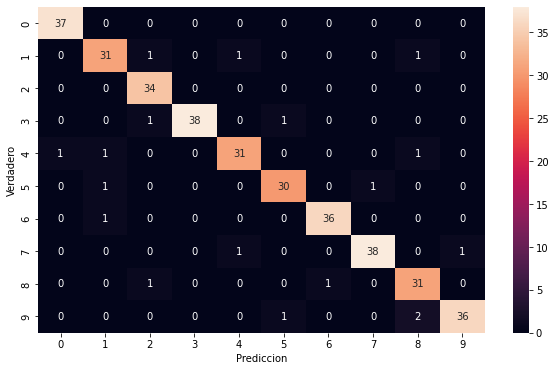

In [131]:
#seaborn es una biblioteca para hacer gráficos estadísticos
#Si tiene problemas para ejecutar seaborn ejecute la siguiente instruccion: pip install seaborn
import seaborn as sn
myplot.figure(figsize=(10,6))
sn.heatmap(mconf,annot=True)
myplot.xlabel('Prediccion')
myplot.ylabel('Verdadero')